###MLP SFS

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import keras
import sklearn.model_selection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('drive/MyDrive/Final_data_CKD_PP.csv')

In [ ]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,80,1.020,1,0,1,1,0,0,121,...,44,7800,5.2,1,2,0,0,0,0,0
1,7,50,1.020,4,0,1,1,0,0,121,...,38,6000,4.8,0,1,0,0,0,0,0
2,62,80,1.010,2,3,1,1,0,0,423,...,31,7500,4.8,0,2,0,1,0,1,0
3,48,70,1.005,4,0,1,0,1,0,117,...,32,6700,3.9,1,1,0,1,1,1,0
4,51,80,1.010,2,0,1,1,0,0,106,...,35,7300,4.6,0,1,0,0,0,0,0


In [ ]:
dataset = dataset[['age','bp','sg','al','rbc','pc','ba','bu','sc','hemo','pcv','wc','htn','dm','pe','classification']] #backward SNS

In [ ]:
dataset

,age,bp,sg,al,rbc,pc,ba,bu,sc,hemo,pcv,wc,htn,dm,pe,classification
0,48,80,1.020,1,1,1,0,36.0,1.2,15.4,44,7800,1,2,0,0
1,7,50,1.020,4,1,1,0,18.0,0.8,11.3,38,6000,0,1,0,0
2,62,80,1.010,2,1,1,0,53.0,1.8,9.6,31,7500,0,2,0,0
3,48,70,1.005,4,1,0,0,56.0,3.8,11.2,32,6700,1,1,1,0
4,51,80,1.010,2,1,1,0,26.0,1.4,11.6,35,7300,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,1,1,0,49.0,0.5,15.7,47,6700,0,1,0,1
396,42,70,1.025,0,1,1,0,31.0,1.2,16.5,54,7800,0,1,0,1
397,12,80,1.020,0,1,1,0,26.0,0.6,15.8,49,6600,0,1,0,1
398,17,60,1.025,0,1,1,0,50.0,1.0,14.2,51,7200,0,1,0,1


In [ ]:
dataset.shape

(400, 16)

In [ ]:
dataset.iloc[:,-1]

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 400, dtype: int64

In [ ]:
# Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
X

array([[48.   , 80.   ,  1.02 , ...,  1.   ,  2.   ,  0.   ],
       [ 7.   , 50.   ,  1.02 , ...,  0.   ,  1.   ,  0.   ],
       [62.   , 80.   ,  1.01 , ...,  0.   ,  2.   ,  0.   ],
       ...,
       [12.   , 80.   ,  1.02 , ...,  0.   ,  1.   ,  0.   ],
       [17.   , 60.   ,  1.025, ...,  0.   ,  1.   ,  0.   ],
       [58.   , 80.   ,  1.025, ...,  0.   ,  1.   ,  0.   ]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape

(300, 15)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_test.shape

(100, 15)

In [ ]:
y_test.shape

(100,)

In [ ]:
y_test

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0])

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
# # Reshaping X_train for efficient modelling
# X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
# X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [ ]:
from keras.layers.normalization.layer_normalization import *
from keras.layers.normalization.batch_normalization import *

In [ ]:
tf.keras.layers.experimental.preprocessing.Normalization

keras.layers.preprocessing.normalization.Normalization

In [ ]:
import time
start_time = time.time()
model = keras.models.Sequential()
# model.add(keras.layers.normalization.BatchNormalization(input_shape=tuple([X_train.shape[1]])))
model.add(keras.layers.core.Dense(32, activation='relu'))
model.add(keras.layers.core.Dropout(rate=0.5))
# model.add(keras.layers.normalization.BatchNormalization())
model.add(keras.layers.core.Dense(32, activation='relu'))
model.add(keras.layers.core.Dropout(rate=0.5))
model.add(keras.layers.core.Dense(1, activation='sigmoid'))

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train,y_train,epochs=100,validation_data=(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
10/10 [==============================] - 1s 30ms/step - loss: 0.6740 - accuracy: 0.5600 - val_loss: 0.6518 - val_accuracy: 0.6500
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6417 - accuracy: 0.5967 - val_loss: 0.6158 - val_accuracy: 0.6500
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.6375 - accuracy: 0.6233 - val_loss: 0.5802 - val_accuracy: 0.6800
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6123 - accuracy: 0.6700 - val_loss: 0.5435 - val_accuracy: 0.9000
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.5639 - accuracy: 0.7100 - val_loss: 0.5032 - val_accuracy: 0.9300
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.5424 - accuracy: 0.7167 - val_loss: 0.4596 - val_accuracy: 0.9500
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4995 - accuracy: 0.7367 - val_loss: 0.4173 - val_accuracy: 0.9700
Epoch 8/100


###plot

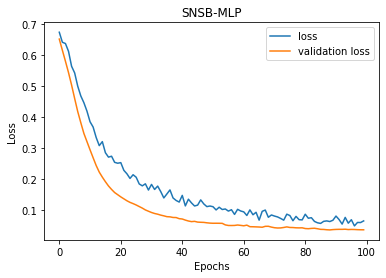

In [ ]:
import matplotlib.pyplot as plt

fig = plt.gcf()
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('SNSB-MLP')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()
fig.savefig('SNSB-MLP.png', dpi=100)

In [ ]:
from google.colab import files
files.download('SNSB-MLP.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

4/4 [==============================] - 0s 4ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        65
           1       0.97      1.00      0.99        35

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [ ]:
print(confusion_matrix(y_test,predictions))

[[64  1]
 [ 0 35]]


In [ ]:
cnf_matrix = [[64, 1],[0, 35]]

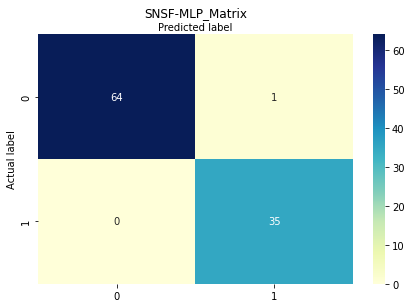

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True,cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('SNSF-MLP_Matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('SNSF-MLP_Matrix.png')
plt.show()

In [ ]:
from google.colab import files
files.download('SNSF-MLP_Matrix.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# from google.colab import files
# files.download('ann_Boruta_output.csv') 